```
Author: Naved Iqbal

Email: navediqbal5@gmail.com

GitHub: https://github.com/Naved-Iqbal/StockTrading.git
```

## **Momentum Scanner**

This code analyzes a list of stocks from the Indian stock market (NSE) and ranks them based on their momentum over various periods (6 months, 3 months, and 1 month). It uses technical indicators such as Exponential Moving Averages (EMAs) and Relative Strength Index (RSI) to identify stocks with strong upward trends and potential for future growth. The code generates a table visualizing the top-ranked stocks based on their momentum scores. You can also save the result in to Google drive in MS-Excel format.

---

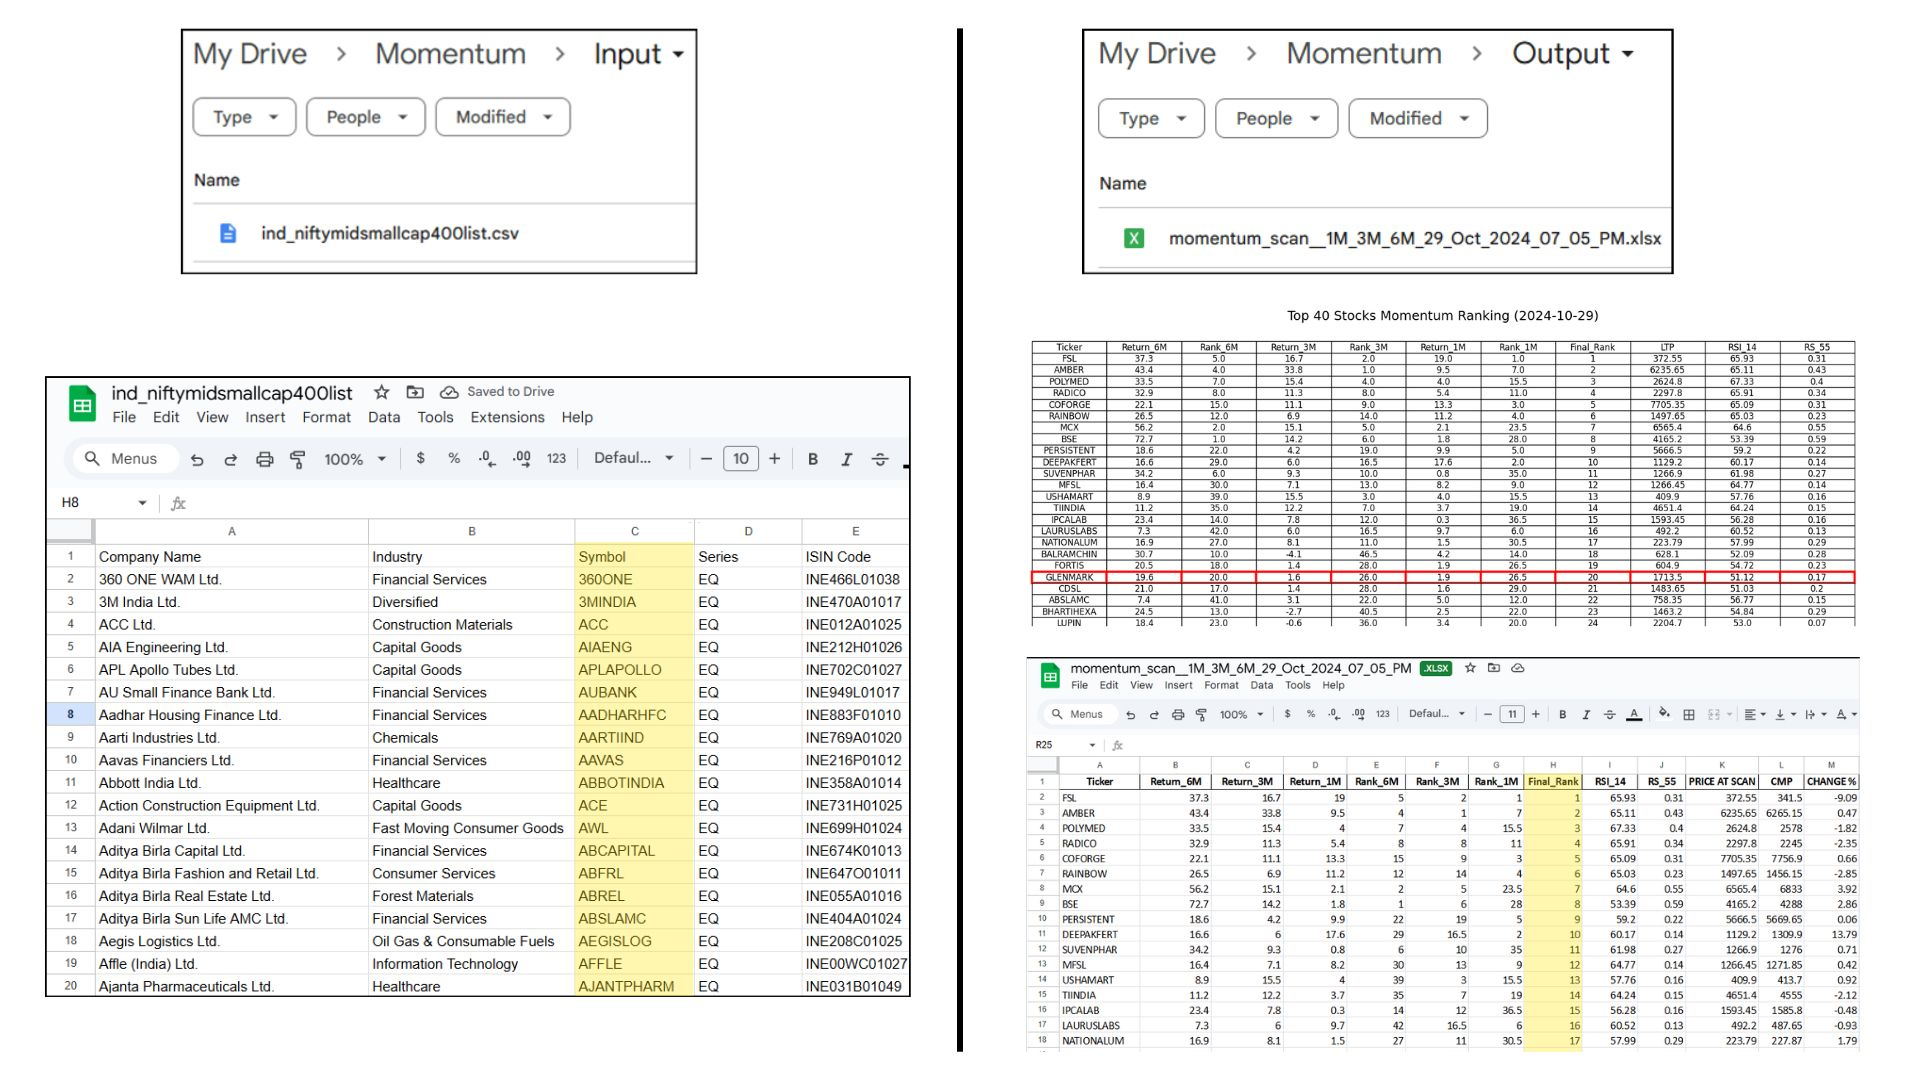

**Import Necessary Libraries**

Import libraries for financial analysis, data handling, and visualization.

In [242]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
from matplotlib.table import Table
from google.colab import drive, files

**Configuration**

Set parameters for data sources, momentum calculation, technical indicators, and stock selection criteria.

In [243]:
import ipywidgets as widgets

# Adjust layout to increase width
layout = widgets.Layout(width='50%')
style = {'description_width': 'initial'}

# Create input widgets
input_symbols_drive_path = widgets.Text(
    value='/content/drive/MyDrive/Momentum/Input/ind_niftymidsmallcap400list.csv',
    description='Input Symbols Google Drive Path:',
    disabled=False,
    layout = layout,
    style = style
)

output_folder = widgets.Text(
    value='/content/drive/MyDrive/Momentum/Output',
    description='Output Google Drive Path:',
    disabled=False,
    layout = layout,
    style = style
)

# # Add end date pickers
today_date_obj = datetime.today()

end_date_picker = widgets.DatePicker(
    value = today_date_obj,
    description='Stock Data Till:',
    disabled=False,
    layout = layout,
    style = style
)

minimum_stock_data = widgets.IntText(
    value=126,
    description='Minimum Stock Data (Candles):',
    disabled=False,
    min=1,
    layout = layout,
    style = style
)

short_term_period = widgets.IntText(
    value=21,
    description='Short-Term Period (Candles):',
    disabled=False,
    min=1,
    layout = layout,
    style = style
)

medium_term_period = widgets.IntText(
    value=63,
    description='Medium-Term Period (Candles):',
    disabled=False,
    min=1,
    layout = layout,
    style = style
)

long_term_period = widgets.IntText(
    value=126,
    description='Long-Term Period (Candles):',
    disabled=False,
    min=1,
    layout = layout,
    style = style
)

rsi_period = widgets.IntText(
    value=14,
    description='RSI Period:',
    disabled=False,
    min=1,
    max=100,
    layout = layout,
    style = style
)

rs_period = widgets.IntText(
    value=55,
    description='RS Period:',
    disabled=False,
    min=1,
    layout = layout,
    style = style
)

minimum_one_year_return = widgets.IntText(
    value=7,
    description='Minimum One-Year Return (%):',
    disabled=False,
    min=1,
    max=100,
    layout = layout,
    style = style
)

within_52_weeks_high_pct = widgets.IntText(
    value=20,
    description='Within 52 Weeks High (%):',
    disabled=False,
    min=1,
    max=100,
    layout = layout,
    style = style
)

minumun_up_days_pct = widgets.IntText(
    value=45,
    description='Minimum Up Days (%):',
    disabled=False,
    min=1,
    max=100,
    layout = layout,
    style = style
)




# Display the widgets
display(input_symbols_drive_path, output_folder, end_date_picker, minimum_stock_data,
        short_term_period, medium_term_period, long_term_period, rsi_period, rs_period,
        minimum_one_year_return, within_52_weeks_high_pct, minumun_up_days_pct)


Text(value='/content/drive/MyDrive/Momentum/Input/ind_niftymidsmallcap400list.csv', description='Input Symbols…

Text(value='/content/drive/MyDrive/Momentum/Output', description='Output Google Drive Path:', layout=Layout(wi…

DatePicker(value=datetime.datetime(2024, 10, 29, 13, 23, 3, 560286), description='Stock Data Till:', layout=La…

IntText(value=126, description='Minimum Stock Data (Candles):', layout=Layout(width='50%'), style=DescriptionS…

IntText(value=21, description='Short-Term Period (Candles):', layout=Layout(width='50%'), style=DescriptionSty…

IntText(value=63, description='Medium-Term Period (Candles):', layout=Layout(width='50%'), style=DescriptionSt…

IntText(value=126, description='Long-Term Period (Candles):', layout=Layout(width='50%'), style=DescriptionSty…

IntText(value=14, description='RSI Period:', layout=Layout(width='50%'), style=DescriptionStyle(description_wi…

IntText(value=55, description='RS Period:', layout=Layout(width='50%'), style=DescriptionStyle(description_wid…

IntText(value=7, description='Minimum One-Year Return (%):', layout=Layout(width='50%'), style=DescriptionStyl…

IntText(value=20, description='Within 52 Weeks High (%):', layout=Layout(width='50%'), style=DescriptionStyle(…

IntText(value=45, description='Minimum Up Days (%):', layout=Layout(width='50%'), style=DescriptionStyle(descr…

**Load Stock Symbols**

Mount Google Drive to access a list of Indian stock symbols from a CSV file.

The commented out code represents an alternative way to define the stock symbols manually, instead of reading them from a CSV file.

In [244]:
drive.mount('/content/drive')
symbols = pd.read_csv(input_symbols_drive_path.value)

symbols['Tickers'] = symbols['Symbol']+'.NS'
tickers = symbols['Tickers'].tolist()


# symbols = ["PERSISTENT","NATIONALUM"]
# tickers = [symbol + '.NS' for symbol in symbols]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Downloads daily historical data for stocks and index**


In [245]:
# Data dictionary to hold stock data
data = {}

daily_data_interval = "1d"

till_date_str = (end_date_picker.value).strftime("%Y-%m-%d")

date_obj = datetime.strptime(till_date_str, "%Y-%m-%d")
from_date_obj = date_obj - timedelta(days=365 * 2)
from_date_str = from_date_obj.strftime("%Y-%m-%d")

print(f"Downloading Daily Time Frame Data ({from_date_str} - {till_date_str}):\n")

daily_data = yf.download(
    tickers=tickers,
    threads=True,
    group_by='ticker',
    start=from_date_str,
    end= till_date_str,
    interval=daily_data_interval)

index_data = yf.download(
    "^NSEI",
    start=from_date_str,
    end=till_date_str,
    interval=daily_data_interval)


[*********************100%***********************]  400 of 400 completed
[*********************100%***********************]  1 of 1 completed


**Calculate Relative Strength Index (RSI)**

Calculate the Relative Strength Index (RSI) for a stock's price data.

In [246]:
def calculate_rsi(df, period):

    delta = df["Close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    _gain = up.ewm(com=(period - 1), min_periods=period).mean()
    _loss = down.abs().ewm(com=(period - 1), min_periods=period).mean()
    RS = _gain / _loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

**Calculate Relative Strength (RS)**

Calculate Relative Strength of a stock against a market index (NIFTY50) over a specified period.

In [247]:
def calculate_rs(stock_data, index_data, length):
  # Step 3: Truncate both DataFrames to the minimum length
  stock_data = stock_data.tail(length+5).copy()
  index_data = index_data.tail(length+5).copy()

  # Reset the index
  stock_data = stock_data.reset_index(drop=True)
  index_data = index_data.reset_index(drop=True)

  # Calculate percentage change over the specified period
  stock_data['Return'] = stock_data['Close'].pct_change(periods=length)
  index_data['Return'] = index_data['Close'].pct_change(periods=length)

  # Calculate Relative Strength
  rs = round(stock_data['Return']  - index_data['Return'], 2)

  return rs

**Stock Filtering and Analysis**

Filter the stocks using conditions:


*   Stock should not be new, should be listed at least 6 months ago
*   EMA (Stock Price Should be above key Moving Averages 50, 100, 200)
*   RSI should be greater than 40 and less than 70
*   Last one year return should be greater than 7-8% (FD Return)
*   Within 20% or 25% from 52-Week High
*   Up Days (Green Candles) Percentage should be greater than 45%


In [255]:
# Create a DataFrame for summary
summary = []

pct_multiplier = round((100 - within_52_weeks_high_pct.value) / 100, 2)


row_counter = 0
filtered_stocks = {}

for ticker in tickers:
    df = daily_data[ticker].copy()
    symbol = ticker.replace(".NS", "")
    df.dropna(inplace=True)

    # No. of candles in stock data
    no_of_rows = df.shape[0]

    # If stock data is less than six months (126 candles)
    if df.empty or no_of_rows < minimum_stock_data.value:
        continue

    ema_condition = False
    last_one_year_return_condition = False
    within_pct_52_week_high_condition = False
    up_days_pct_condition = False

    try:

        # Latest close price
        latest_close_price = round(df['Close'].iloc[-1], 2)

        # Calculate EMA-100
        df['EMA_50'] = df['Close'].ewm(span=50).mean()
        df['EMA_100'] = df['Close'].ewm(span=100).mean()

        latest_ema_50 = round(df['EMA_50'].iloc[-1], 2)
        latest_ema_100 = round(df['EMA_100'].iloc[-1], 2)

        # Calculate RSI (Relative Strength Index)
        df['RSI'] = calculate_rsi(df, rsi_period.value)
        daily_rsi = round(df['RSI'].iloc[-1], 2)

        # Calculate RS (Relative Strength)
        rs = calculate_rs(df, index_data, rs_period.value)
        daily_rs = rs.iloc[-1]

        # Check if there is sufficient data (more than one year)
        # Calculate EMA-200, 52 Weeks High and one year return
        if no_of_rows >= 252:

            # 52-week high
            high_52_week = round((df['High'][-252:]).max(), 2)
            within_pct_52_week_high_condition = latest_close_price >= high_52_week * pct_multiplier

            # Last one year return
            last_one_year_price = round(df['Close'].iloc[-252], 2)
            one_year_return = round((latest_close_price / last_one_year_price - 1) * 100, 2)

            # Last one year return condition
            last_one_year_return_condition = one_year_return >= minimum_one_year_return.value

            df['EMA_200'] = df['Close'].ewm(span=200).mean()
            latest_ema_200 = round(df['EMA_200'].iloc[-1], 2)

            # EMA condition
            ema_condition = latest_close_price >= latest_ema_50 and\
                            latest_ema_50 > latest_ema_100 and\
                            latest_ema_100 > latest_ema_200

        else:
            # 52-week high
            high_52_week = round((df['High'][-no_of_rows:]).max(), 2)
            within_pct_52_week_high_condition = latest_close_price >= high_52_week * pct_multiplier

            # Last one year return condition
            # If stock data is less than a year, return since stock is listed
            one_year_return = round((latest_close_price/ df['Close'].iloc[-no_of_rows] - 1) * 100, 2)
            last_one_year_return_condition = one_year_return >= minimum_one_year_return.value

            # EMA condition
            ema_condition = latest_close_price >= latest_ema_50 and\
                            latest_ema_50 > latest_ema_100


        # More than 45% up days in the last 6 months (126 trading days)
        long_term_data = df['Close'].iloc[-long_term_period.value:]

        up_days = (long_term_data.pct_change() > 0).sum()
        up_days_pct = up_days / len(long_term_data) * 100

        up_days_pct_condition = up_days_pct > minumun_up_days_pct.value


        rsi_condition = daily_rsi > 40 and daily_rsi < 70

        # Filtering criteria
        if (ema_condition and
            last_one_year_return_condition and
            within_pct_52_week_high_condition and
            up_days_pct_condition and
            rsi_condition):

            # Calculate returns
            return_6m = (df['Close'].iloc[-1] / df['Close'].iloc[-63] - 1) * 100
            return_3m = (df['Close'].iloc[-1] / df['Close'].iloc[-21] - 1) * 100
            return_1m = (df['Close'].iloc[-1] / df['Close'].iloc[-5] - 1) * 100

            summary.append({
                'Ticker': symbol,
                'Return_6M': return_6m,
                'Return_3M': return_3m,
                'Return_1M': return_1m,
            })

            filtered_stocks[symbol] = {"RSI": daily_rsi, "RS": daily_rs ,"LTP": round(df['Adj Close'].iloc[-1], 2)}

            row_counter += 1
    except Exception as e:
        print(f"Error analyzing {symbol}: {e}")


**Ranks stocks by momentum, select top performers**

In [256]:
# Convert summary to DataFrame
df_summary = pd.DataFrame(summary)

# Round off returns to 1 decimal place
df_summary['Return_6M'] = df_summary['Return_6M'].round(1)
df_summary['Return_3M'] = df_summary['Return_3M'].round(1)
df_summary['Return_1M'] = df_summary['Return_1M'].round(1)

# Ranking based on returns
df_summary['Rank_6M'] = df_summary['Return_6M'].rank(ascending=False)
df_summary['Rank_3M'] = df_summary['Return_3M'].rank(ascending=False)
df_summary['Rank_1M'] = df_summary['Return_1M'].rank(ascending=False)

# df_summary['Cumulative_Return'] = df_summary['Return_6M'] + df_summary['Return_3M'] + df_summary['Return_1M']
# df_summary['Final_Rank'] = df_summary['Cumulative_Return'].rank(ascending=False)

# Calculate final rank
df_summary['Cumulative_Rank'] = (df_summary['Rank_6M'] + df_summary['Rank_3M'] + df_summary['Rank_1M'])/3

# Sort by final rank and get top 30
df_summary_sorted = df_summary.sort_values('Cumulative_Rank').head(40)

df_summary_sorted = df_summary_sorted.drop(columns=['Cumulative_Rank'])

# Assign position based on final rank
df_summary_sorted['Final_Rank'] = np.arange(1, len(df_summary_sorted) + 1)

df_summary_sorted.reset_index(drop=True, inplace=True)

RSI_label = f'RSI_{rsi_period.value}'
RS_label = f'RS_{rs_period.value}'

# Add columns to Google Sheet for tracking stocks
df_summary_sorted[RSI_label] = df_summary_sorted.apply(lambda row: filtered_stocks[row['Ticker']]['RSI'], axis=1)
df_summary_sorted[RS_label] = df_summary_sorted.apply(lambda row: filtered_stocks[row['Ticker']]['RS'], axis=1)
df_summary_sorted['PRICE AT SCAN'] = df_summary_sorted.apply(lambda row: filtered_stocks[row['Ticker']]['LTP'], axis=1)

**Visualizes the top stock rankings using a table and highlights the top 15 stocks**

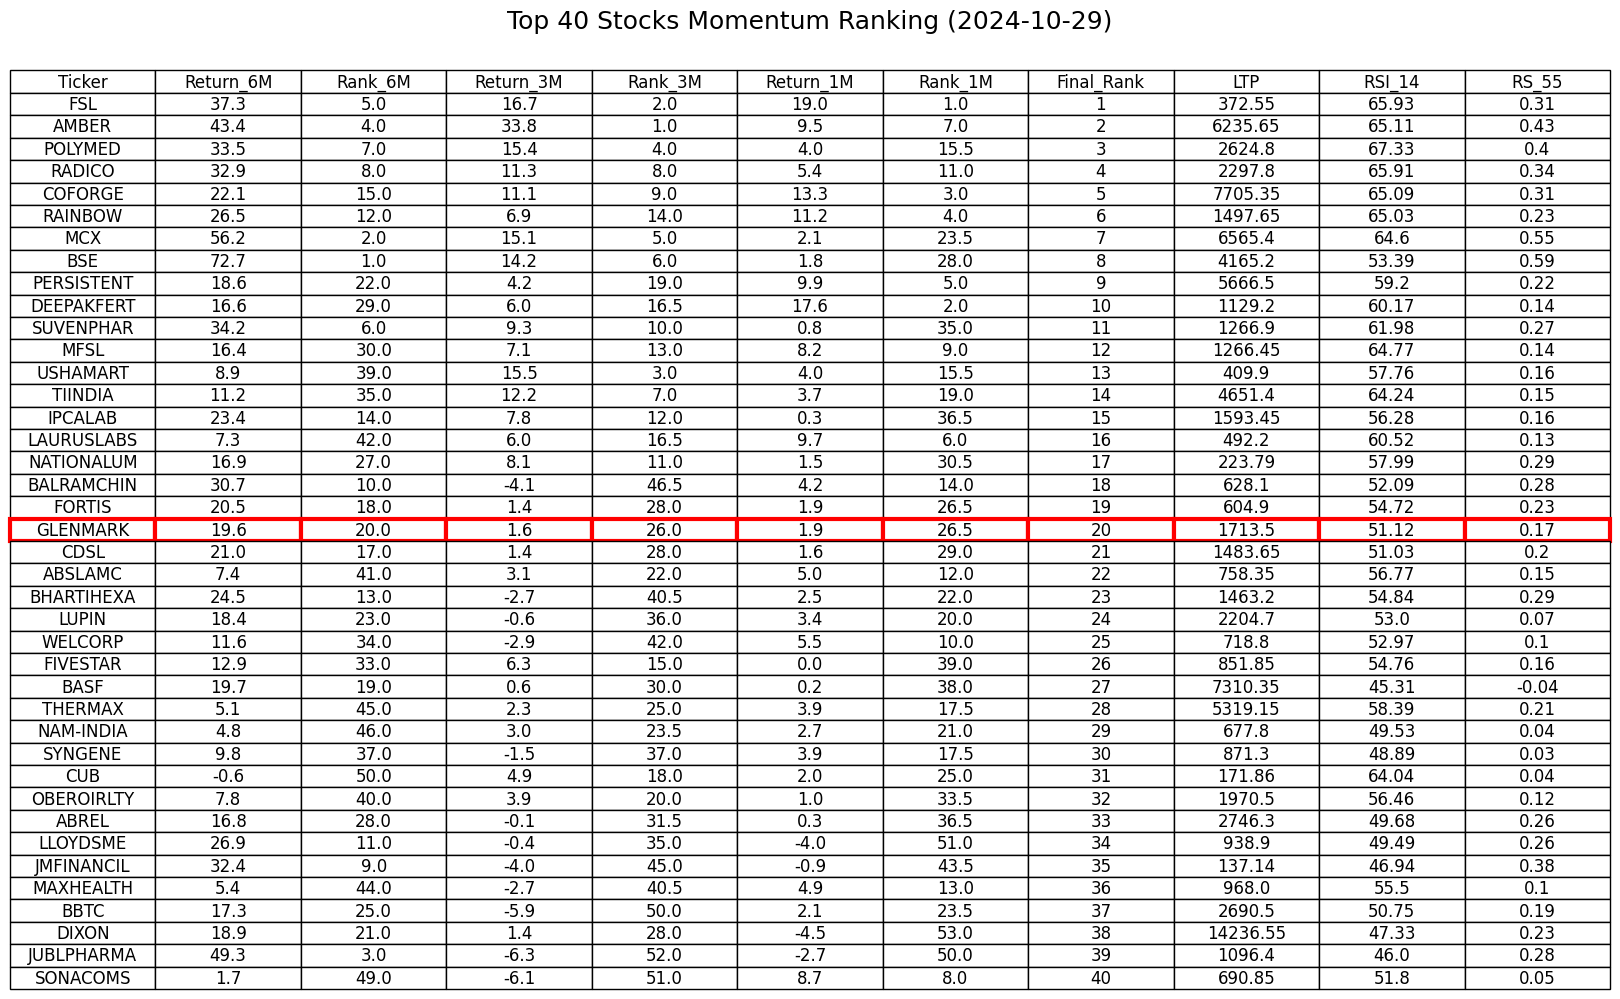

In [257]:
# Separate top 15 and next 15
top_15 = df_summary_sorted.head(15)
next_15 = df_summary_sorted.iloc[15:30]

# Prepare table data
tbl_data = []
for i, row in df_summary_sorted.iterrows():
    tbl_data.append([row['Ticker'],
                     row['Return_6M'], row['Rank_6M'],
                     row['Return_3M'], row['Rank_3M'],
                     row['Return_1M'], row['Rank_1M'],
                     row['Final_Rank'], row['PRICE AT SCAN'],
                     row[RSI_label], row[RS_label] ])


# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(20, 13))
ax.axis('tight')
ax.axis('off')

# Create a table
col_labels = ['Ticker', 'Return_6M', 'Rank_6M', 'Return_3M', 'Rank_3M', 'Return_1M',
              'Rank_1M', 'Final_Rank', 'LTP', RSI_label, RS_label]

#col_labels = ['Ticker', 'Return_6M', 'Rank_6M', 'Return_3M', 'Rank_3M', 'Return_1M', 'Rank_1M', 'Final_Rank'
table = ax.table(cellText=tbl_data, colLabels=col_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Draw a red line to separate the top 15
for i in range(len(col_labels)):
    cell = table[(20, i)]
    cell.set_edgecolor('red')
    cell.set_linewidth(3)

# Adjust layout
plt.subplots_adjust(left=0.1, top=0.8)  # Adjust top parameter for title position
plt.title(f'Top 40 Stocks Momentum Ranking ({till_date_str})', fontsize=18, y=1.05)  # y parameter for title position
plt.show()

**Save the stock rankings to an Excel file on Google Drive.**

In [258]:
# save table in Excel file in Google drive

df_summary_sorted['CMP'] = df_summary_sorted.apply(lambda row: f'=GOOGLEFINANCE("NSE:"&A{row.name+2}, "price")', axis=1)
df_summary_sorted['CHANGE %'] = df_summary_sorted.apply(lambda row: f'=ROUND((L{row.name+2} - K{row.name+2}) / L{row.name+2} * 100, 2)', axis=1)

ist_timezone = pytz.timezone('Asia/Kolkata')
current_datetime_ist = datetime.now(ist_timezone)
date_string = current_datetime_ist.strftime("%d_%b_%Y_%I_%M_%p")

output_file_path = f'{output_folder.value}/momentum_scan__1M_3M_6M_{date_string}.xlsx'

# Assuming 'df_summary_sorted' is your DataFrame
df_summary_sorted.to_excel(output_file_path, index=False)

print("Excel file saved to Google Drive.")

# If you want to download the file locally as well, you can uncomment the following line:
# files.download(output_file_path)

Excel file saved to Google Drive.
